<a href="https://colab.research.google.com/github/AqsaHerryPrastyo/Machine-Learning/blob/main/JS04_SOAL_KUIS1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [ ]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [ ]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [ ]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Data Size
df.shape

(48842, 15)

In [ ]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [ ]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
# Memeriksa jumlah missing value per kolom

df.replace('?', np.nan, inplace=True)
missing_values = df.isnull().sum()
print("\nVariabel dengan nilai hilang dan jumlahnya:")
print(missing_values[missing_values > 0])


Variabel dengan nilai hilang dan jumlahnya:
sex_encoded       48842
income_encoded    48842
dtype: int64


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [ ]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Ganti '?' dengan NaN untuk mendeteksi missing values
df.replace('?', np.nan, inplace=True)

# Imputasi untuk kolom kategorikal
for column in df.select_dtypes(include=['object']).columns:
    if df[column].isnull().sum() > 0:
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)

# Tangani kolom sex_encoded dan income_encoded
# Jika sepenuhnya kosong, hapus kolom tersebut
if 'sex_encoded' in df.columns and df['sex_encoded'].isnull().all():
    df.drop('sex_encoded', axis=1, inplace=True)
if 'income_encoded' in df.columns and df['income_encoded'].isnull().all():
    df.drop('income_encoded', axis=1, inplace=True)

# Cek ulang missing values
missing_values = df.isnull().sum()
print("\nVariabel dengan nilai hilang setelah imputasi:")
print(missing_values[missing_values > 0])


Variabel dengan nilai hilang setelah imputasi:
Series([], dtype: int64)


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [ ]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Inspeksi fitur kualitatif (kategorikal)
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"\nNilai unik untuk kolom {column}:")
    print(df[column].value_counts(dropna=False))

# Penyesuaian nilai yang tidak sesuai atau duplikasi
# Contoh: Kolom 'workclass' memiliki nilai '?' yang tidak sesuai
df['workclass'] = df['workclass'].replace('?', 'Others')

# Kolom 'occupation' memiliki nilai '?' yang tidak sesuai
df['occupation'] = df['occupation'].replace('?', 'Others')

# Kolom 'native-country' memiliki nilai '?' yang tidak sesuai
df['native-country'] = df['native-country'].replace('?', 'Others')

# Kolom 'income' memiliki duplikasi karena tanda baca: '<=50K', '<=50K.', '>50K', '>50K.'
df['income'] = df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

# Cek kembali nilai unik setelah penyesuaian
for column in categorical_columns:
    print(f"\nNilai unik untuk kolom {column} setelah penyesuaian:")
    print(df[column].value_counts(dropna=False))


Nilai unik untuk kolom workclass:
workclass
private             34869
self-emp-not-inc     3862
local-gov            3136
state-gov            1981
others               1836
self-emp-inc         1695
federal-gov          1432
without-pay            21
never-worked           10
Name: count, dtype: int64

Nilai unik untuk kolom education:
education
hs-grad         15784
some-college    10878
bachelors        8025
masters          2657
assoc-voc        2061
11th             1812
assoc-acdm       1601
10th             1389
7th-8th           955
prof-school       834
9th               756
12th              657
doctorate         594
5th-6th           509
1st-4th           247
preschool          83
Name: count, dtype: int64

Nilai unik untuk kolom marital-status:
marital-status
married-civ-spouse       22379
never-married            16117
divorced                  6633
separated                 1530
widowed                   1518
married-spouse-absent      628
married-af-spouse           37


# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

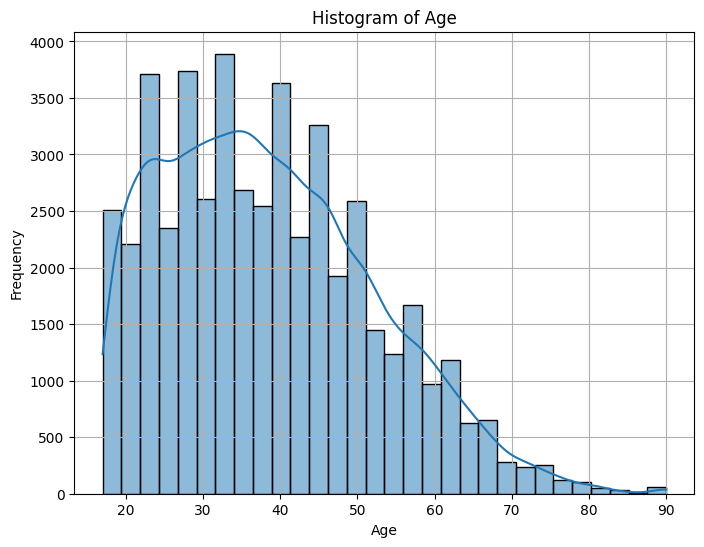

In [ ]:
# Jawab 1.1 - Histrogram
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

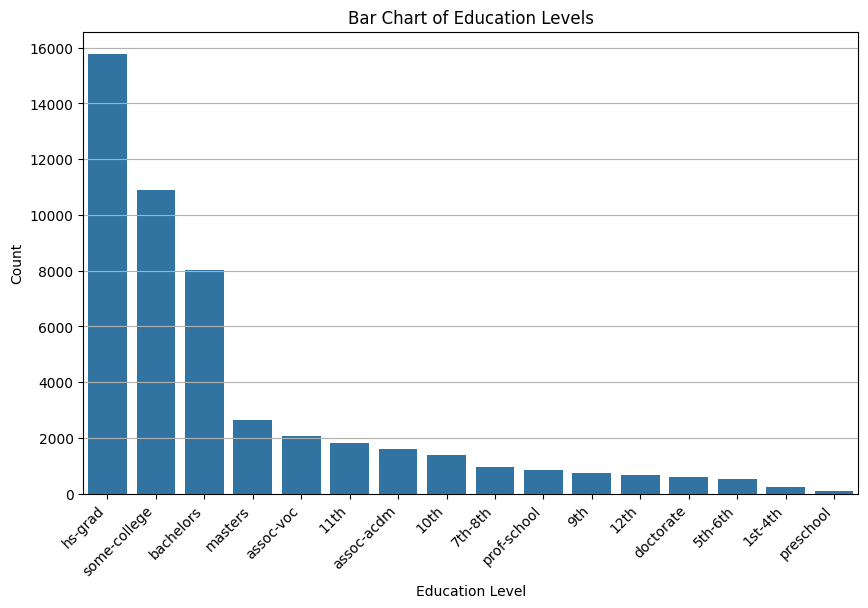

In [ ]:
# Jawab 1.2 - Barchart
plt.figure(figsize=(10, 6))
education_counts = df['education'].value_counts()
sns.barplot(x=education_counts.index, y=education_counts.values)
plt.title('Bar Chart of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.show()

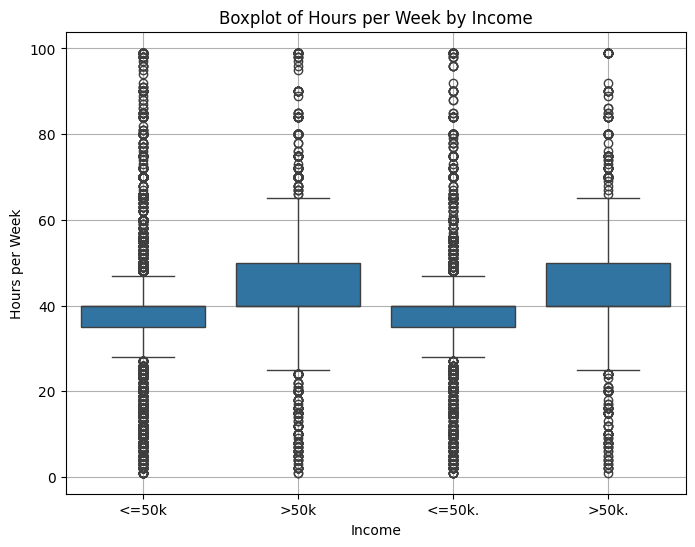

In [ ]:
# Jawab 1.3 - Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Boxplot of Hours per Week by Income')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.grid(True)
plt.show()

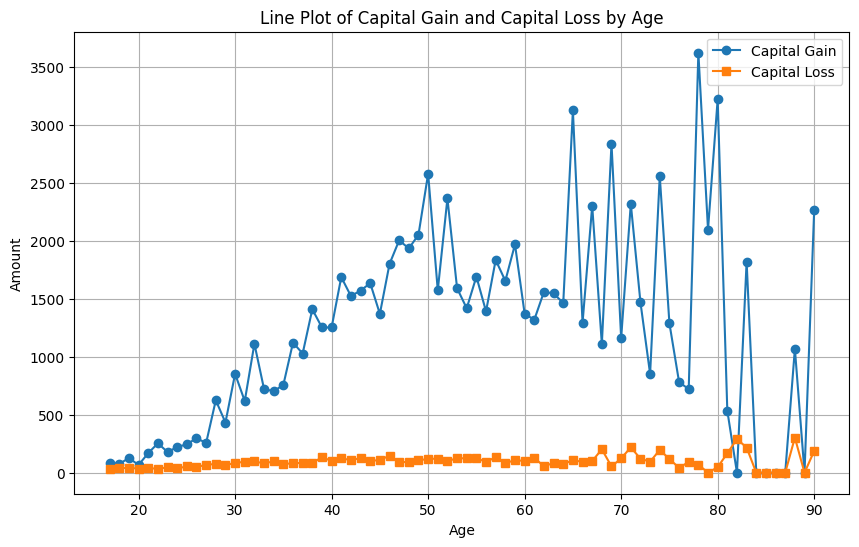

In [ ]:
# Jawab 1.4 - Lineplot
age_agg = df.groupby('age')[['capital-gain', 'capital-loss']].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(age_agg['age'], age_agg['capital-gain'], label='Capital Gain', marker='o')
plt.plot(age_agg['age'], age_agg['capital-loss'], label='Capital Loss', marker='s')
plt.title('Line Plot of Capital Gain and Capital Loss by Age')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [ ]:
# Jawab dengan komentar python

# 1. Fenomena yang terjadi pada distribusi data 'age' adalah distribusi yang miring ke kanan (right-skewed).
# Hal ini ditunjukkan oleh histogram di mana sebagian besar data terkonsentrasi pada usia muda (sekitar 20-50 tahun),
# dengan ekor panjang ke arah usia lebih tua, dan mean (rata-rata) lebih tinggi daripada median.

# 2. Jika terdapat data yang hilang pada variabel 'age', strategi yang saya terapkan adalah imputasi dengan median.
# Mengapa? Karena distribusi 'age' miring ke kanan, sehingga median lebih representatif sebagai ukuran pusat data
# dibandingkan mean, yang dapat terdistorsi oleh nilai ekstrem atau skew.

# 3. Jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hours-per-week' dapat dihitung menggunakan metode IQR
# dari boxplot. Berdasarkan perhitungan, kategori <=50K memiliki 5588 outlier, dan kategori >50K memiliki 1255 outlier.
# Kategori yang paling banyak memiliki outlier adalah <=50K.

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [ ]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan


# Encoding kolom 'sex' sesuai nilai aktual (male, female)
df['sex_encoded'] = df['sex'].map({'male': 1, 'female': 0})

# Encoding kolom 'income' sesuai nilai aktual (<=50k, >50k)
df['income_encoded'] = df['income'].map({'<=50k': 0, '>50k': 1})

# Verifikasi hasil encoding
print("\nHasil encoding untuk kolom 'sex':")
print(df[['sex', 'sex_encoded']].head())
print("\nHasil encoding untuk kolom 'income':")
print(df[['income', 'income_encoded']].head())


Hasil encoding untuk kolom 'sex':
      sex  sex_encoded
0    male            1
1    male            1
2    male            1
3    male            1
4  female            0

Hasil encoding untuk kolom 'income':
  income  income_encoded
0  <=50k             0.0
1  <=50k             0.0
2  <=50k             0.0
3  <=50k             0.0
4  <=50k             0.0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?


Matriks Korelasi:
                     age  education-num  hours-per-week  capital-gain  \
age             1.000000       0.030940        0.071558      0.077229   
education-num   0.030940       1.000000        0.143689      0.125146   
hours-per-week  0.071558       0.143689        1.000000      0.082157   
capital-gain    0.077229       0.125146        0.082157      1.000000   
capital-loss    0.056944       0.080972        0.054467     -0.031441   
income_encoded  0.234037       0.335154        0.229689      0.223329   

                capital-loss  income_encoded  
age                 0.056944        0.234037  
education-num       0.080972        0.335154  
hours-per-week      0.054467        0.229689  
capital-gain       -0.031441        0.223329  
capital-loss        1.000000        0.150526  
income_encoded      0.150526        1.000000  


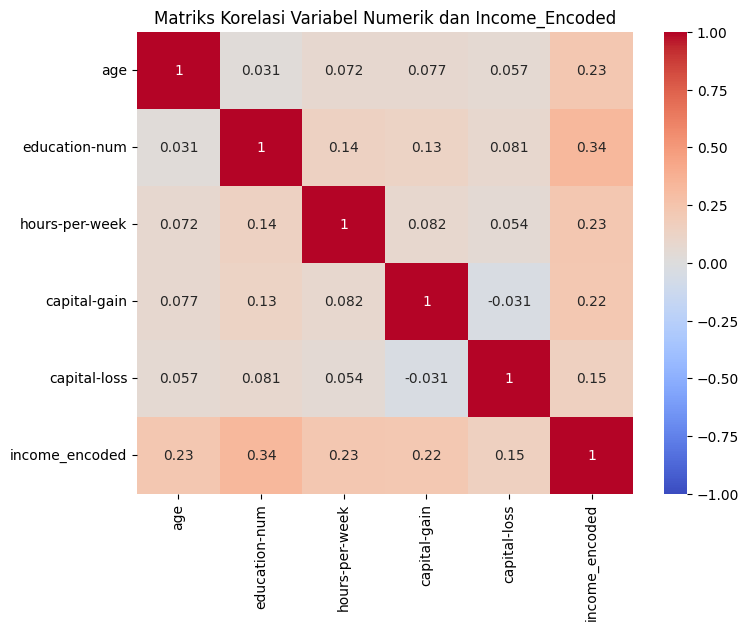

In [ ]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Pilih kolom numerik dan kolom income_encoded
numeric_columns = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income_encoded']
df_numeric = df[numeric_columns]

# Hitung matriks korelasi
correlation_matrix = df_numeric.corr()

# Tampilkan matriks korelasi
print("\nMatriks Korelasi:")
print(correlation_matrix)

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriks Korelasi Variabel Numerik dan Income_Encoded')
plt.show()

In [ ]:
# Hasil analisis jelaskan pada cell ini


# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [ ]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


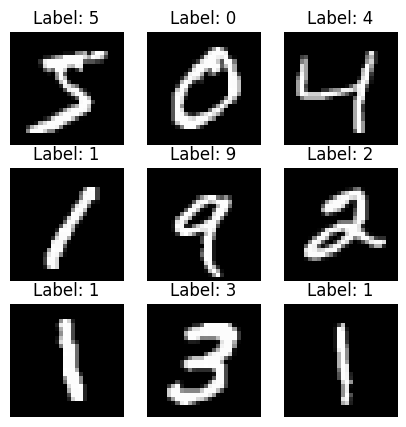

In [ ]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

Melakukan upsampling pada semua data test...
Progress: 2000/10000 gambar telah diproses
Progress: 4000/10000 gambar telah diproses
Progress: 6000/10000 gambar telah diproses
Progress: 8000/10000 gambar telah diproses
Progress: 10000/10000 gambar telah diproses
Upsampling selesai!
Shape original: (10000, 28, 28)
Shape setelah upsampling: (10000, 32, 32)


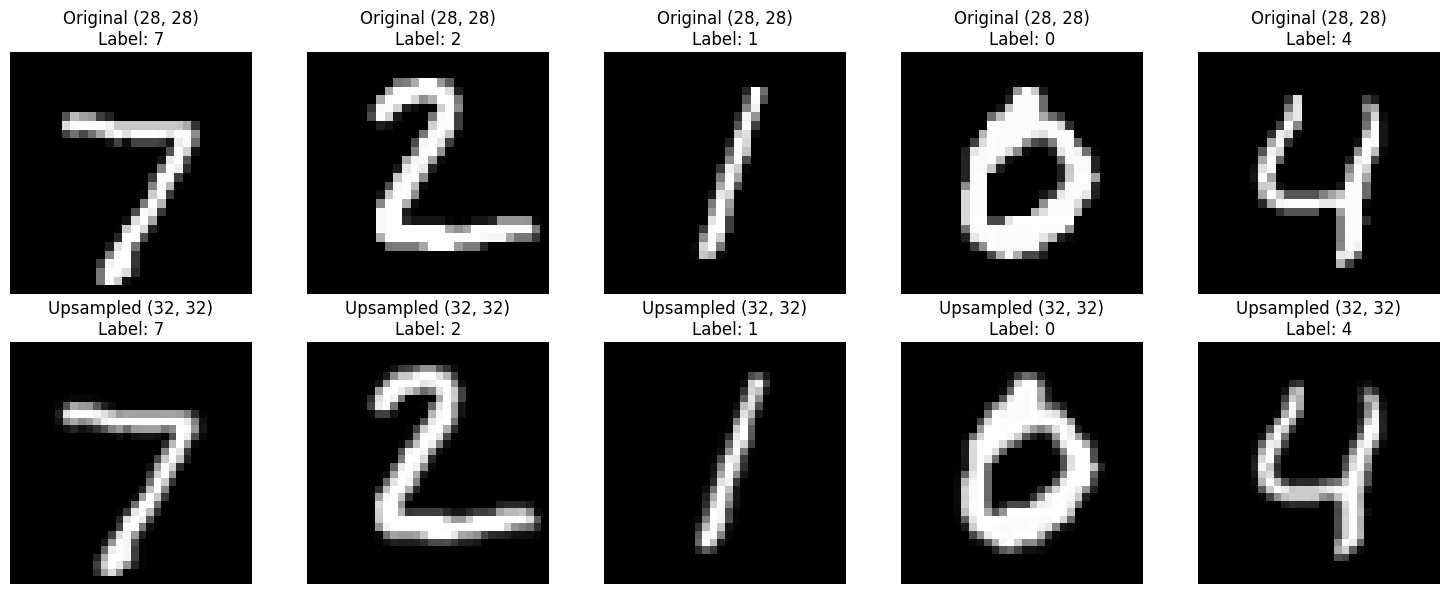

In [ ]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

import cv2

# Function untuk upsampling
def upsample_image(image, target_size=(32, 32)):
    """
    Melakukan upsampling gambar ke ukuran target
    """
    return cv2.resize(image, target_size, interpolation=cv2.INTER_CUBIC)

# Membuat array kosong untuk menampung hasil upsampling
X_test_upsampled = np.zeros((X_test.shape[0], 32, 32), dtype=np.uint8)

# Proses upsampling untuk semua data test
print("Melakukan upsampling pada semua data test...")
for i in range(X_test.shape[0]):
    X_test_upsampled[i] = upsample_image(X_test[i])
    if (i + 1) % 2000 == 0:
        print(f"Progress: {i + 1}/{X_test.shape[0]} gambar telah diproses")

print(f"Upsampling selesai!")
print(f"Shape original: {X_test.shape}")
print(f"Shape setelah upsampling: {X_test_upsampled.shape}")

# Tampilkan 5 data hasil upsampling
plt.figure(figsize=(15, 6))
for i in range(5):
    # Gambar original
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i], cmap="gray")
    plt.title(f"Original {X_test[i].shape}\nLabel: {y_test[i]}")
    plt.axis("off")

    # Gambar setelah upsampling
    plt.subplot(2, 5, i+6)
    plt.imshow(X_test_upsampled[i], cmap="gray")
    plt.title(f"Upsampled {X_test_upsampled[i].shape}\nLabel: {y_test[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

Melakukan normalisasi pada data yang sudah di-upsample...
Normalisasi selesai!
Range nilai sebelum normalisasi: 0 - 255
Range nilai setelah normalisasi: 0.000 - 1.000
Data type sebelum: uint8
Data type setelah: float32


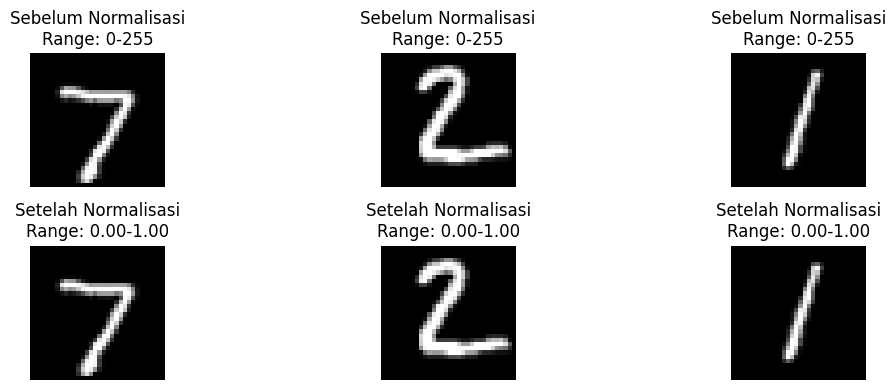

In [ ]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Function untuk normalisasi
def normalize_pixels(images):
    """
    Normalisasi nilai piksel dari range 0-255 menjadi 0-1
    """
    return images.astype('float32') / 255.0

# Melakukan normalisasi pada data yang sudah di-upsample
print("Melakukan normalisasi pada data yang sudah di-upsample...")
X_test_normalized = normalize_pixels(X_test_upsampled)

print("Normalisasi selesai!")
print(f"Range nilai sebelum normalisasi: {X_test_upsampled.min()} - {X_test_upsampled.max()}")
print(f"Range nilai setelah normalisasi: {X_test_normalized.min():.3f} - {X_test_normalized.max():.3f}")
print(f"Data type sebelum: {X_test_upsampled.dtype}")
print(f"Data type setelah: {X_test_normalized.dtype}")

# Tampilkan contoh hasil normalisasi
plt.figure(figsize=(12, 4))
for i in range(3):
    # Sebelum normalisasi
    plt.subplot(2, 3, i+1)
    plt.imshow(X_test_upsampled[i], cmap="gray")
    plt.title(f"Sebelum Normalisasi\nRange: {X_test_upsampled[i].min()}-{X_test_upsampled[i].max()}")
    plt.axis("off")

    # Setelah normalisasi
    plt.subplot(2, 3, i+4)
    plt.imshow(X_test_normalized[i], cmap="gray")
    plt.title(f"Setelah Normalisasi\nRange: {X_test_normalized[i].min():.2f}-{X_test_normalized[i].max():.2f}")
    plt.axis("off")

plt.tight_layout()
plt.show()

## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

Melakukan flattening pada semua data test...
Flattening selesai!
Shape sebelum flatten: (10000, 32, 32)
Shape setelah flatten: (10000, 1024)

Verifikasi data integrity:
Sample 0: Data integrity OK = True
Sample 1: Data integrity OK = True
Sample 2: Data integrity OK = True


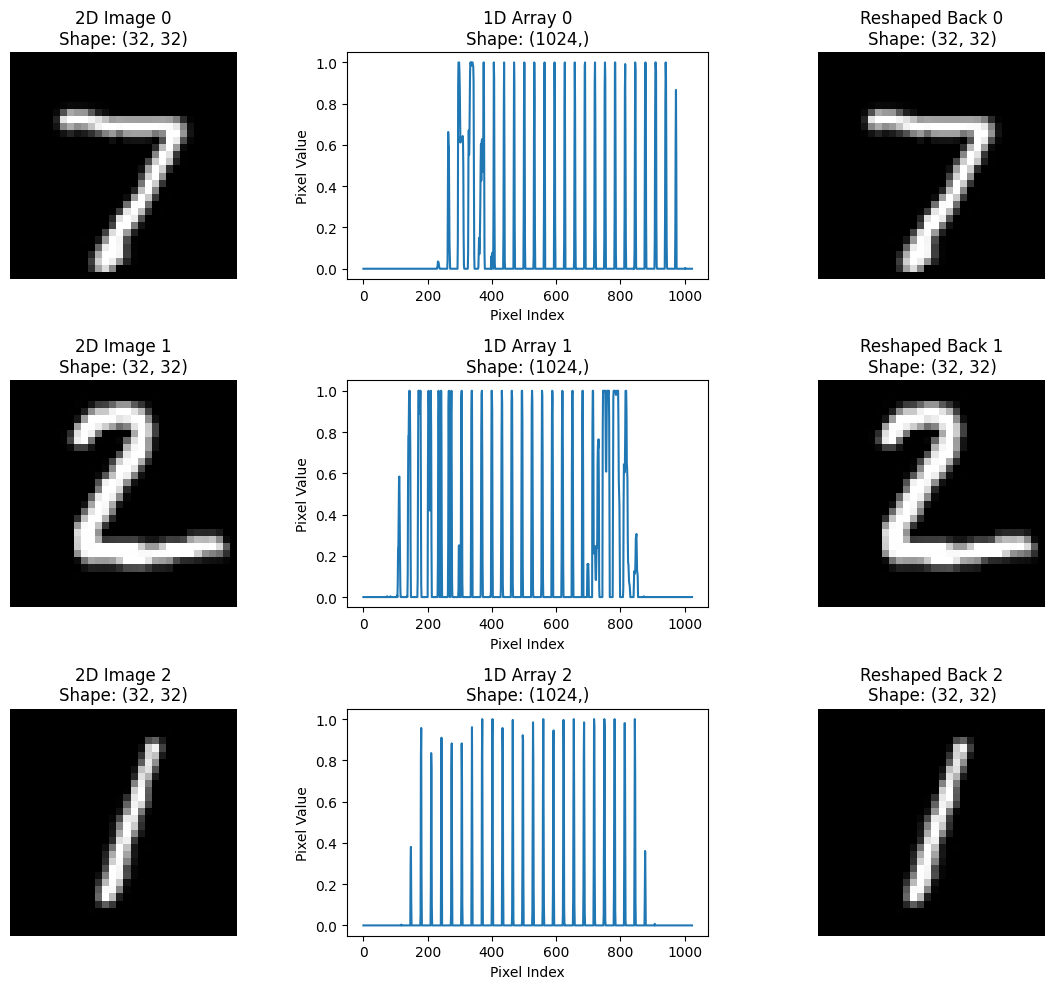


=== RINGKASAN HASIL PRE-PROCESSING ===
Jumlah data: 10,000
Ukuran fitur per sampel: 1,024 piksel
Total piksel yang diproses: 10,240,000
Range nilai: 0.000 - 1.000
Memory usage: 39.06 MB


In [ ]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Function untuk flatten/reshape ke 1D
def flatten_images(images):
    """
    Mengubah citra 2D menjadi array 1D
    """
    return images.reshape(images.shape[0], -1)

# Membuat holder array kosong untuk menampung hasil flattening
print("Melakukan flattening pada semua data test...")
X_test_flattened = flatten_images(X_test_normalized)

print("Flattening selesai!")
print(f"Shape sebelum flatten: {X_test_normalized.shape}")
print(f"Shape setelah flatten: {X_test_flattened.shape}")

# Verifikasi bahwa data masih sama (cek beberapa sampel)
print("\nVerifikasi data integrity:")
for i in range(3):
    # Reshape kembali ke 2D untuk verifikasi
    reshaped_back = X_test_flattened[i].reshape(32, 32)
    is_equal = np.allclose(reshaped_back, X_test_normalized[i])
    print(f"Sample {i}: Data integrity OK = {is_equal}")

# Tampilkan visualisasi perbandingan
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

for i in range(3):
    # Gambar 2D original
    axes[i, 0].imshow(X_test_normalized[i], cmap="gray")
    axes[i, 0].set_title(f"2D Image {i}\nShape: {X_test_normalized[i].shape}")
    axes[i, 0].axis("off")

    # Plot 1D array sebagai line plot
    axes[i, 1].plot(X_test_flattened[i])
    axes[i, 1].set_title(f"1D Array {i}\nShape: {X_test_flattened[i].shape}")
    axes[i, 1].set_xlabel("Pixel Index")
    axes[i, 1].set_ylabel("Pixel Value")

    # Gambar yang di-reshape kembali untuk verifikasi
    reshaped_back = X_test_flattened[i].reshape(32, 32)
    axes[i, 2].imshow(reshaped_back, cmap="gray")
    axes[i, 2].set_title(f"Reshaped Back {i}\nShape: {reshaped_back.shape}")
    axes[i, 2].axis("off")

plt.tight_layout()
plt.show()

# Tampilkan statistik final
print(f"\n=== RINGKASAN HASIL PRE-PROCESSING ===")
print(f"Jumlah data: {X_test_flattened.shape[0]:,}")
print(f"Ukuran fitur per sampel: {X_test_flattened.shape[1]:,} piksel")
print(f"Total piksel yang diproses: {X_test_flattened.shape[0] * X_test_flattened.shape[1]:,}")
print(f"Range nilai: {X_test_flattened.min():.3f} - {X_test_flattened.max():.3f}")
print(f"Memory usage: {X_test_flattened.nbytes / (1024*1024):.2f} MB")